# Q8

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Using monthly excess returns for the five industry portfolios:

Calculate and report the risk premium and the standard deviation of (excess) return, for the five industry portfolios and the global minimum-variance portfolio.

Plot the minimum-variance frontier (without riskless asset) generated by the five industry portfolios, with risk premium on the vertical axis and standard deviation of (excess) return on the horizontal axis. This graph must cover the range from 0% to 3% per month, in increments of 0.1% (or less), on the vertical axis.

Using a suitable value for the y-intercept, plot the efficient frontier generated by the five industry portfolios with the riskless asset, on the same graph as the minimum-variance frontier.

Calculate and report the Sharpe ratio and portfolio weights for the "tangency" portfolio where the two frontiers intersect.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
Industry_Portfolio=pd.read_excel("Exam-Industry.xlsx",index_col=0)
Industry_Portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
190101,-1.34,4.20,3.01,-0.71,1.92
190102,2.89,4.87,3.45,3.33,2.63
190103,1.89,1.81,-0.83,2.29,-0.86
190104,4.36,2.58,3.16,6.37,1.11
190105,0.92,-2.55,-1.13,1.96,-2.40
...,...,...,...,...,...
190608,1.71,0.80,4.36,2.85,2.59
190609,-3.28,-2.84,-6.16,-6.01,-2.26
190610,8.63,6.01,6.74,2.25,7.25


In [3]:
Summary = pd.DataFrame({"Mean":Industry_Portfolio.mean(),"Std":Industry_Portfolio.std()})
Summary

,Mean,Std
Cnsmr,1.449167,3.114793
Manuf,1.108889,3.935195
HiTec,1.672361,3.787931
Hlth,1.452083,3.601339
Other,1.366389,4.314297


In [4]:
R=pd.DataFrame(data=Industry_Portfolio.mean(axis=0))                          # Vector of expected returns

V=Industry_Portfolio.cov()                                                    # Covariance matrix of returns

V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

e = pd.DataFrame(data=np.ones((Industry_Portfolio.shape[1], 1)),              # n x 1 unit vector
                 index=Industry_Portfolio.columns, 
                 columns=["Dummy"])

In [5]:
# Compute Alpha
Alpha = (R.T @ V_inv @ e).values[0, 0]

# Compute Zeta
Zeta = (R.T @ V_inv @ R).values[0, 0]

# Compute Delta
Delta = (e.T @ V_inv @ e).values[0, 0]

In [6]:
# Compute 'a'
numerator_a1 = (Zeta * V_inv @ e)
numerator_a2 = (Alpha * V_inv @ R)
numerator_a = numerator_a1.values - numerator_a2.values
denominator_a = (Zeta * Delta) - Alpha**2
a = numerator_a / denominator_a

In [7]:
# Compute 'b'
numerator_b1 = (Delta * V_inv @ R)
numerator_b2 = (Alpha * V_inv @ e)
numerator_b = numerator_b1.values - numerator_b2.values
denominator_b = (Zeta * Delta) - Alpha**2
b = numerator_b / denominator_b

In [8]:
# Create the DataFrame with a range of portfolio returns as the index
returns_range = np.arange(0, 3.1, 0.001)
Minimum_Varaince_Frontier = pd.DataFrame(index=returns_range, 
                                         columns=Industry_Portfolio.columns)

# Fill the DataFrame with weights based on the formula
for portfolio_return in returns_range:
    weights = a + b * portfolio_return
    Minimum_Varaince_Frontier.loc[portfolio_return, :] = weights.T

Minimum_Varaince_Frontier

,Cnsmr,Manuf,HiTec,Hlth,Other
0.000,0.791943,3.095822,-2.177562,0.367628,-1.077831
0.001,0.791908,3.093742,-2.176022,0.367581,-1.077209
0.002,0.791873,3.091662,-2.174482,0.367535,-1.076588
0.003,0.791838,3.089582,-2.172942,0.367488,-1.075966
0.004,0.791803,3.087502,-2.171402,0.367442,-1.075344
...,...,...,...,...,...
3.095,0.683447,-3.342324,2.589246,0.22348,0.84615
3.096,0.683412,-3.344404,2.590787,0.223434,0.846772
3.097,0.683377,-3.346484,2.592327,0.223387,0.847394
3.098,0.683342,-3.348564,2.593867,0.223341,0.848015


In [9]:
# Mean return for global minimum-variance portfolio
R_mv=Alpha/Delta
R_mv

1.4112796473123832

In [10]:
# Variance for global minimum-variance portfolio
Variance_mv=(1/Delta)
Variance_mv

8.940889678213951

In [ ]:
# Standard deviation for global minimum-variance portfolio
SD_mv=np.sqrt(Variance_mv)
SD_mv

2.990132050297102

In [12]:
Minimum_Varaince_Frontier["Variance"]=(1/Delta)+(Delta/(Zeta*Delta-Alpha**2))*(Minimum_Varaince_Frontier.index-R_mv)**2

In [13]:
Minimum_Varaince_Frontier["SD"]=np.sqrt(Minimum_Varaince_Frontier["Variance"])

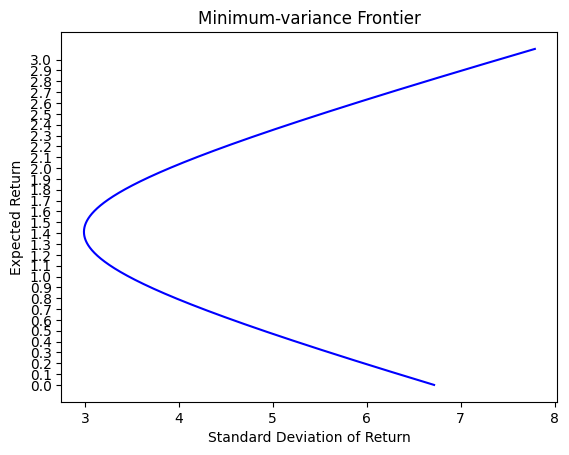

In [14]:
plt.plot(Minimum_Varaince_Frontier["SD"], Minimum_Varaince_Frontier.index, color='blue', linestyle='-')

#in increments of 0.1%
plt.yticks(np.arange(0, 3.1, 0.1))
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-variance Frontier')
plt.show() 

In [15]:
rf=0.13

In [16]:
# Note that the np.arrange is supposed to be portfolio standard deviation (the x-axis)
Risk_free_line = rf + np.arange(0, 6, 0.001)*(Zeta-2*Alpha*rf+Delta*(rf**2))**0.5

In [17]:
Minimum_Varaince_Frontier["Riskless_Variance"]=((Minimum_Varaince_Frontier.index-rf)**2)/(Zeta - 2*Alpha*rf + Delta*(rf**2))

In [18]:
Minimum_Varaince_Frontier["Riskless_SD"] = (Minimum_Varaince_Frontier.index-rf)/np.sqrt(Zeta - 2*Alpha*rf + Delta*(rf**2))

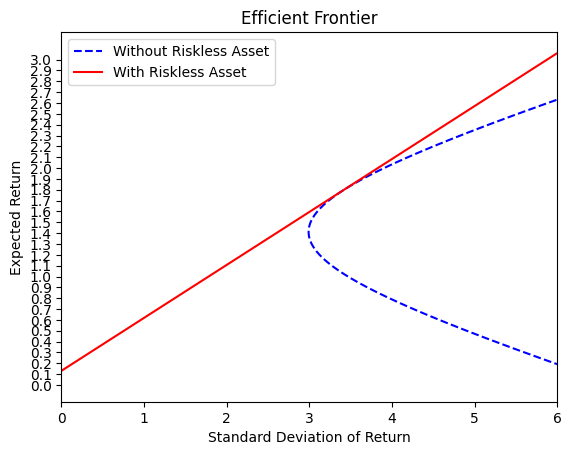

In [19]:
plt.plot(Minimum_Varaince_Frontier["SD"], 
         Minimum_Varaince_Frontier.index, 
         color='blue', 
         linestyle='--', 
         label = "Without Riskless Asset")

plt.plot(Minimum_Varaince_Frontier["Riskless_SD"], 
         Minimum_Varaince_Frontier.index, 
         color='red', 
         linestyle='-', 
         label = "With Riskless Asset")

plt.yticks(np.arange(0, 3.1, 0.1))
plt.xlim(0,6)
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

In [20]:
Sharpe = np.sqrt(Zeta - 2*Alpha*rf + Delta*rf**2)
Sharpe

0.4885546167555229

In [21]:
# Return of tangency portfolio

R_tg = (Alpha*rf - Zeta)/(Delta*rf - Alpha)
R_tg

1.7955706215515184

In [22]:
# Get the weights for the tangency portfolio

w_star = a + b*R_tg
w_star

array([[ 0.72899859],
       [-0.63928141],
       [ 0.5879116 ],
       [ 0.28400054],
       [ 0.03837069]])

In [23]:
Tangency_portfolio=pd.DataFrame(data=w_star,index=Industry_Portfolio.columns,columns=["Optimal_Weights"])

Tangency_portfolio

,Optimal_Weights
Cnsmr,0.728999
Manuf,-0.639281
HiTec,0.587912
Hlth,0.284001
Other,0.038371
